## Exploratory Data Analysis



In [112]:
#imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

C:\Users\hardi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#get the current working directory
cwd = os.getcwd()

order_details = pd.read_csv(cwd+"/pizza_sales_data/order_details.csv")
orders = pd.read_csv(cwd + "/pizza_sales_data/orders.csv")
pizza_type = pd.read_csv(cwd + "/pizza_sales_data/pizza_types.csv",encoding = 'unicode_escape')
pizzas = pd.read_csv(cwd + "/pizza_sales_data/pizzas.csv")

In [3]:
#let's check the order details
order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [13]:
order_details.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False)

pizza_id
big_meat_s        1914
thai_ckn_l        1410
five_cheese_l     1409
four_cheese_l     1316
classic_dlx_m     1181
                  ... 
mexicana_s         162
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      95
the_greek_xxl       28
Name: quantity, Length: 91, dtype: int64

Clearly Big Meat Pizza is the best selling and The Greek is the worst selling but in different categories of sizes. Thai Chicken is best selling in Large size and Classic deluxe is best selling in medium size pizzas.

In [14]:
orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [30]:
#Let's try to find the sales

order_price = pd.merge(pd.merge(order_details, orders, on='order_id', how='inner'), 
         pizzas, on='pizza_id',how='inner')
order_price.groupby('pizza_id')['price'].sum().sort_values(ascending=False)

pizza_id
thai_ckn_l        28323.75
five_cheese_l     25141.50
four_cheese_l     22850.35
spicy_ital_l      22576.00
big_meat_s        21732.00
                    ...   
mexicana_s         1920.00
green_garden_l     1903.50
ckn_alfredo_s      1224.00
calabrese_s        1212.75
the_greek_xxl      1006.60
Name: price, Length: 91, dtype: float64

Thai Chicken pizza is highest selling as well as it generates high revenue. However, clearly, the business needs to focus on The Greek Pizza. It is the least selling pizza as well. 

### Average Order value

In [42]:
#Let's check the average order value
print(f" ${round(order_price['price'].mean(),2)} is the average order value")

$16.49 is the average order value


### Revenue over months

In [51]:
#Let's convert the object to datetime for date column

order_price['date'] = pd.to_datetime(order_price['date'])

In [85]:
#;et's add a column of month to our new dataset
order_price['month'] = order_price['date'].dt.month
order_price['weekday'] = order_price['date'].dt.weekday
order_price['weekday_name'] = order_price['date'].dt.day_name()

In [86]:
order_price.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,month,weekday,weekday_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,1,3,Thursday
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,1,4,Friday
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,1,5,Saturday
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,1,5,Saturday
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,1,6,Sunday


Text(0, 0.5, 'Summed Price for each month')

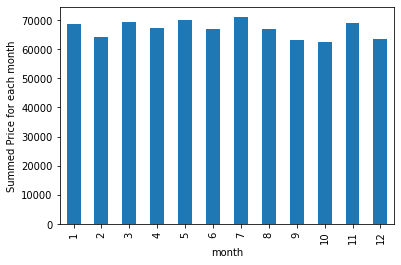

In [71]:
#now groupby month and check the total sales for each month

order_price.groupby('month')['price'].sum().plot(kind='bar')
plt.ylabel("Summed Price for each month")

From the above chart, it appears that month of September and October had the lowest sales, however, the sales are fairly consitent across all month.

In [111]:
#let's check for the month of January which day the sales are high

order_price[order_price['month']==1].groupby('weekday_name')['price'].sum().sort_values(ascending=False)

weekday_name
Tuesday      12328.05
Monday       11310.90
Friday       10339.25
Sunday        9064.35
Thursday      8836.90
Saturday      8817.90
Wednesday     8500.65
Name: price, dtype: float64

This was for the month of january, let's try to find which days are doing better on average.

In [116]:
order_price.groupby('weekday_name')['price'].sum().sort_values(ascending=False)

weekday_name
Friday       133773.90
Thursday     120912.45
Saturday     120865.30
Wednesday    112006.45
Tuesday      111764.70
Monday       105357.15
Sunday        97264.75
Name: price, dtype: float64

In [146]:
# unique list of ingredients used for pizzas
list_of_ingredients = pizza_type['ingredients'].unique().tolist()

In [155]:
#create a list of all ingredients used
ingredients = []
for item in list_of_ingredients:
    list_of_items = item.split(", ")
    for n in list_of_items:
        if n in ingredients:
            pass
        else:
            ingredients.append(n)
    

In [159]:
#see the list
ingredients

['Barbecued Chicken',
 'Red Peppers',
 'Green Peppers',
 'Tomatoes',
 'Red Onions',
 'Barbecue Sauce',
 'Chicken',
 'Artichoke',
 'Spinach',
 'Garlic',
 'Jalapeno Peppers',
 'Fontina Cheese',
 'Gouda Cheese',
 'Mushrooms',
 'Asiago Cheese',
 'Alfredo Sauce',
 'Pesto Sauce',
 'Corn',
 'Cilantro',
 'Chipotle Sauce',
 'Pineapple',
 'Thai Sweet Chilli Sauce',
 'Bacon',
 'Pepperoni',
 'Italian Sausage',
 'Chorizo Sausage',
 'Sliced Ham',
 'Mozzarella Cheese',
 'Capocollo',
 'Goat Cheese',
 'Oregano',
 'Anchovies',
 'Green Olives',
 'Kalamata Olives',
 'Feta Cheese',
 'Beef Chuck Roast',
 'Brie Carre Cheese',
 'Prosciutto',
 'Caramelized Onions',
 'Pears',
 'Thyme',
 '\x91Nduja Salami',
 'Pancetta',
 'Friggitello Peppers',
 'Calabrese Salami',
 'Genoa Salami',
 'Prosciutto di San Daniele',
 'Arugula',
 'Coarse Sicilian Salami',
 'Luganega Sausage',
 'Onions',
 'Soppressata Salami',
 'Artichokes',
 'Peperoncini verdi',
 'Provolone Cheese',
 'Smoked Gouda Cheese',
 'Romano Cheese',
 'Blue Chee

Artichokes appear twice in the list, hence we will remove one item. There is item which needs name replacement.

In [160]:
#remove artichoke
ingredients.remove('Artichoke')


In [168]:
#get the index
index = ingredients.index('\x91Nduja Salami')

#replace the item at that index with proper name
ingredients[index] = "Nduja Salami"

In [169]:
ingredients

['Barbecued Chicken',
 'Red Peppers',
 'Green Peppers',
 'Tomatoes',
 'Red Onions',
 'Barbecue Sauce',
 'Chicken',
 'Spinach',
 'Garlic',
 'Jalapeno Peppers',
 'Fontina Cheese',
 'Gouda Cheese',
 'Mushrooms',
 'Asiago Cheese',
 'Alfredo Sauce',
 'Pesto Sauce',
 'Corn',
 'Cilantro',
 'Chipotle Sauce',
 'Pineapple',
 'Thai Sweet Chilli Sauce',
 'Bacon',
 'Pepperoni',
 'Italian Sausage',
 'Chorizo Sausage',
 'Sliced Ham',
 'Mozzarella Cheese',
 'Capocollo',
 'Goat Cheese',
 'Oregano',
 'Anchovies',
 'Green Olives',
 'Kalamata Olives',
 'Feta Cheese',
 'Beef Chuck Roast',
 'Brie Carre Cheese',
 'Prosciutto',
 'Caramelized Onions',
 'Pears',
 'Thyme',
 'Nduja Salami',
 'Pancetta',
 'Friggitello Peppers',
 'Calabrese Salami',
 'Genoa Salami',
 'Prosciutto di San Daniele',
 'Arugula',
 'Coarse Sicilian Salami',
 'Luganega Sausage',
 'Onions',
 'Soppressata Salami',
 'Artichokes',
 'Peperoncini verdi',
 'Provolone Cheese',
 'Smoked Gouda Cheese',
 'Romano Cheese',
 'Blue Cheese',
 'Ricotta Che